# Scraping jobs data from wuzzuf.net by Selenium

### Import Libraries 

In [1]:
# install google chrome
!wget https://dl.google.com/linux/linux_signing_key.pub
!sudo apt-key add linux_signing_key.pub
!echo 'deb [arch=amd64] http://dl.google.com/linux/chrome/deb/ stable main' >> /etc/apt/sources.list.d/google-chrome.list
!sudo apt-get -y update
!sudo apt-get install -y google-chrome-stable

--2022-07-16 19:04:02--  https://dl.google.com/linux/linux_signing_key.pub
Resolving dl.google.com (dl.google.com)... 142.250.97.91, 142.250.97.190, 142.250.97.93, ...
Connecting to dl.google.com (dl.google.com)|142.250.97.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12415 (12K) [application/octet-stream]
Saving to: ‘linux_signing_key.pub’

linux_signing_key.p 100%[===================>]  12.12K  --.-KB/s    in 0s      

2022-07-16 19:04:03 (70.9 MB/s) - ‘linux_signing_key.pub’ saved [12415/12415]

OK
Get:1 http://dl.google.com/linux/chrome/deb stable InRelease [1811 B]
Get:2 http://packages.cloud.google.com/apt gcsfuse-focal InRelease [5389 B]
Get:3 https://packages.cloud.google.com/apt cloud-sdk InRelease [6751 B]
Get:4 https://packages.cloud.google.com/apt google-fast-socket InRelease [5405 B]
Get:5 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:6 http://archive.ubuntu.com/ubuntu focal InRelease
Get:7 http://dl.google.com/linux

In [2]:
# install chromedriver
# !apt-get install -y qq unzip
!wget -O /tmp/chromedriver.zip http://chromedriver.storage.googleapis.com/`curl -sS chromedriver.storage.googleapis.com/LATEST_RELEASE`/chromedriver_linux64.zip
!unzip /tmp/chromedriver.zip chromedriver -d /usr/local/bin/

--2022-07-16 19:04:26--  http://chromedriver.storage.googleapis.com/103.0.5060.53/chromedriver_linux64.zip
Resolving chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)... 172.217.203.128, 2607:f8b0:400c:c07::80
Connecting to chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)|172.217.203.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7052799 (6.7M) [application/zip]
Saving to: ‘/tmp/chromedriver.zip’

/tmp/chromedriver.z 100%[===================>]   6.73M  --.-KB/s    in 0.02s   

2022-07-16 19:04:26 (380 MB/s) - ‘/tmp/chromedriver.zip’ saved [7052799/7052799]

Archive:  /tmp/chromedriver.zip
  inflating: /usr/local/bin/chromedriver  


In [3]:
# install selenium
!sudo apt install -y python3-selenium
!pip install selenium==3.141.0 > /dev/null




The following additional packages will be installed:
  apparmor chromium-browser chromium-chromedriver liblzo2-2 snapd
  squashfs-tools
Suggested packages:
  apparmor-profiles-extra apparmor-utils zenity | kdialog
The following NEW packages will be installed:
  apparmor chromium-browser chromium-chromedriver liblzo2-2 python3-selenium
  snapd squashfs-tools
0 upgraded, 7 newly installed, 0 to remove and 62 not upgraded.
Need to get 36.4 MB of archives.
After this operation, 154 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 apparmor amd64 2.13.3-7ubuntu5.1 [494 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 liblzo2-2 amd64 2.10-2 [50.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 squashfs-tools amd64 1:4.4-1ubuntu0.3 [117 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 snapd amd64 2.55.5+20.04 [35.6 MB]
Get:5 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64

In [4]:
# To check Google Chrome's version
!google-chrome --version

Google Chrome 103.0.5060.114 


In [5]:
# To check Chrome Driver's version
!chromedriver -v

ChromeDriver 103.0.5060.53 (a1711811edd74ff1cf2150f36ffa3b0dae40b17f-refs/branch-heads/5060@{#853})


In [6]:
import pandas as pd 
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
import time
from PIL import Image
from selenium.webdriver.common.by import By

### Initialize &Open New Driver session 

In [7]:

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--headless')
chrome_options.add_argument('--disable-gpu')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument('--incognito')
chrome_options.add_argument('--start-maximized')
chrome_options.add_argument("--window-size=1920,1080")
chrome_options.add_argument('-disk-cache-size-300000000000')
driver = webdriver.Chrome(options=chrome_options)


In [8]:
#Open wuzzuf.net in Chrome Driver session
#driver.get(r'https://wuzzuf.net/login?ref=g_menu')

In [9]:
#Login to wuzzuf.net
#driver.find_element_by_css_selector("input[class='css-1ldpk49 e1n2h7jb1']").send_keys('@gmail.com')#usename
#driver.find_element_by_css_selector("input[name='password']").send_keys("")#password
#driver.find_element_by_css_selector("button[class='css-14ghl4e ezfki8j0']").click() #Login

### Scrape job data on wuzzuf 

In [10]:
# Go to this link and click on search
driver.get(r'https://wuzzuf.net/search/jobs/?q=&a=navbl')
time.sleep(2)
Serach_Input=driver.find_element_by_css_selector("input[placeholder='Search by Job Title, Keywords, or Location (e.g. Sales in Cairo)']")   
Serach_Input.send_keys(Keys.ENTER)

In [11]:
# Create DataFrame "AllJobs" to store all data
AllJobs = pd.DataFrame(columns=["Title","Company","Location","Time","Type"])

### Scrape 100 Data Point for test

In [12]:
while driver.find_element_by_css_selector("button[class='css-zye1os ezfki8j0']"):
    if len(AllJobs) >= 100 : #stop when AllJobs have 100 Data Point
        break 
    count= 1
    Job_Elements=driver.find_elements_by_css_selector("div[class='css-1gatmva e1v1l3u10']") 
    for job in Job_Elements :
        job_Title=(job.find_element_by_css_selector("a[class='css-o171kl']").text)
        Company=(job.find_element_by_css_selector("a[class='css-17s97q8']").text)
        Location=(job.find_element_by_css_selector("span[class='css-5wys0k']").text)        
        Time=(job.find_element_by_css_selector("div[class='css-d7j1kk']").find_element_by_css_selector("div").text)       
        Type=(job.find_element_by_css_selector("span[class='css-1ve4b75 eoyjyou0']").text)
        count=count+1
        AllJobs = AllJobs.append({"Title":job_Title, "Company":Company, "Location":Location, 'Time':Time,
        "Type":Type}, ignore_index=True)
    driver.find_elements_by_css_selector("button[class='css-zye1os ezfki8j0']")[-1].click()
    time.sleep(4)

In [13]:
print(AllJobs.shape)
AllJobs

(105, 5)


,Title,Company,Location,Time,Type
0,Customer Service Agent VOIS Non-Cairo\Giza\Ale...,_VOIS Egypt -,"Cairo, Egypt",2 hours ago,Full Time
1,Media buyer,Hatolna -,"Heliopolis, Cairo, Egypt",1 hour ago,Full Time
2,Sales Representative - Memberships Cairo,Wadi Degla Group -,"Nasr City, Cairo, Egypt",52 minutes ago,Full Time
3,Purchasing Engineer – Fleet & Heavy Equipment,Elmarakby Steel -,"6th of October, Giza, Egypt",49 minutes ago,Full Time
4,Purchasing Engineer – Mechanical Spare Parts,Elmarakby Steel -,"6th of October, Giza, Egypt",45 minutes ago,Full Time
...,...,...,...,...,...
100,Data Annotation,GAP CLOUD -,"Maadi, Cairo, Egypt",2 days ago,Full Time
101,Digital Marketing Manager ( E-commerce ),Confidential -,"Cairo, Egypt",2 days ago,Full Time
102,Front End Developer,Shelter Technology -,"Heliopolis, Cairo, Egypt",2 days ago,Full Time
103,E-commerce operation manager,Confidential -,"Cairo, Egypt",2 days ago,Full Time


###  Scrape job data on wuzzuf  with Search List 


In [14]:
# List for search
Job_List=['Data Analyst','Power BI']

In [15]:
# Create DataFrame "Jobs" to store data
Jobs = pd.DataFrame(columns=["Title","Company","Location","Time","Type",'SearchText'])
len(Jobs)

0

In [16]:
Jobs

,Title,Company,Location,Time,Type,SearchText


### Scraper & Store Data in DataFrame

In [17]:
Total_found=1
for Job in Job_List :
    driver.get(r'https://wuzzuf.net/search/jobs/?q=&a=navbl')
    Serach_Input=driver.find_element_by_css_selector("input[placeholder='Search by Job Title, Keywords, or Location (e.g. Sales in Cairo)']")   
    Serach_Input.clear()
    Serach_Input.send_keys(Job)  
    Serach_Input.send_keys(Keys.ENTER)
    time.sleep(4)
    Jobs_found=driver.find_element_by_css_selector("span[class='css-xkh9ud']").find_element_by_tag_name('strong')    
    Total_found=int(Jobs_found.text)+Total_found

    while driver.find_element_by_css_selector("button[class='css-zye1os ezfki8j0']"):
        if len(Jobs)+1 >= Total_found :
            break 
        count= 1
        Job_Elements=driver.find_elements_by_css_selector("div[class='css-1gatmva e1v1l3u10']") 
        for job in Job_Elements :
                job_Title=(job.find_element_by_css_selector("a[class='css-o171kl']").text)
                Company=(job.find_element_by_css_selector("a[class='css-17s97q8']").text)
                Location=(job.find_element_by_css_selector("span[class='css-5wys0k']").text)               
                try :
                       Time=(job.find_element_by_css_selector("div[class='css-d7j1kk']").find_element_by_css_selector("div").text)             
                except:
                      Time ='Null'  
                try :
                    Type=(job.find_element_by_css_selector("span[class='css-1ve4b75 eoyjyou0']").text)
                except:
                    Type ='Null' 
                count=count+1
                Jobs = Jobs.append({"Title":job_Title, "Company":Company, "Location":Location, "Time":Time,
                "Type":Type,"SearchText":Job}, ignore_index=True)
        driver.find_elements_by_css_selector("button[class='css-zye1os ezfki8j0']")[-1].click()
        time.sleep(4)

In [18]:
Jobs.head()

,Title,Company,Location,Time,Type,SearchText
0,Senior Digital Data Analyst,Jazeera Paints -,"10th of Ramadan City, Cairo, Egypt",10 days ago,Full Time,Data Analyst
1,Data Analyst,Grand Plast -,"Salam City, Cairo, Egypt",2 days ago,Full Time,Data Analyst
2,Senior Data & Web Analyst,Finstek -,"New Cairo, Cairo, Egypt",15 days ago,Full Time,Data Analyst
3,Data analyst,Confidential -,"Qalyub, Qalubia, Egypt",26 days ago,Full Time,Data Analyst
4,Data Analyst,Rashideen Egypt for Trade -,"Basatin, Cairo, Egypt",23 days ago,Full Time,Data Analyst


### Data Cleaning

In [19]:
# split Location and Time
Jobs[['City', 'State', 'Country']] = Jobs['Location'].str.split(',', expand=True)
Jobs[['Period_Num', 'Period', 'Period_Other']] = Jobs['Time'].str.split(' ', expand=True)

In [20]:
#drop  Location','Time','Period_Other
Jobs.drop(['Location','Time','Period_Other'],axis=1,inplace=True)
#remove - from company name
Jobs['Company']=Jobs['Company'].str[:-1]


In [21]:
Jobs.head()

,Title,Company,Type,SearchText,City,State,Country,Period_Num,Period
0,Senior Digital Data Analyst,Jazeera Paints,Full Time,Data Analyst,10th of Ramadan City,Cairo,Egypt,10,days
1,Data Analyst,Grand Plast,Full Time,Data Analyst,Salam City,Cairo,Egypt,2,days
2,Senior Data & Web Analyst,Finstek,Full Time,Data Analyst,New Cairo,Cairo,Egypt,15,days
3,Data analyst,Confidential,Full Time,Data Analyst,Qalyub,Qalubia,Egypt,26,days
4,Data Analyst,Rashideen Egypt for Trade,Full Time,Data Analyst,Basatin,Cairo,Egypt,23,days


In [22]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme(style="darkgrid")

<AxesSubplot:xlabel='count', ylabel='State'>

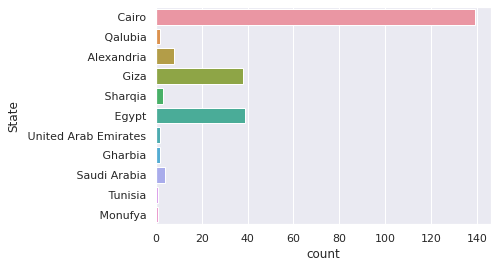

In [23]:
sns.countplot(y='State',data=Jobs)

<AxesSubplot:xlabel='SearchText', ylabel='count'>

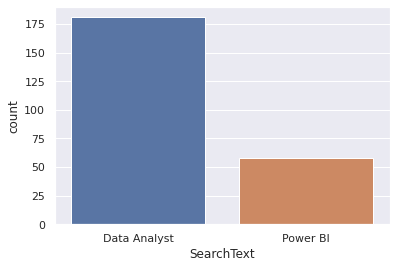

In [24]:
sns.countplot(x='SearchText',data=Jobs)

In [25]:
Jobs['Type'].value_counts()

Full Time              233
Freelance / Project      4
Internship               2
Name: Type, dtype: int64

In [26]:
import os
os.chdir('/kaggle/working')
Jobs.to_csv('/kaggle/working/Wuzzuf_Jos.csv')